###1. Importación de librerías y dataset limpio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar dataset limpio
df = pd.read_csv("market_data_clean.csv", parse_dates=["Date"], index_col="Date")

df.head()

,MXN_Close,GSPC_Close,IXIC_Close,MXX_Close,MXN_High,GSPC_High,IXIC_High,MXX_High,MXN_Low,GSPC_Low,IXIC_Low,MXX_Low,MXN_Open,GSPC_Open,IXIC_Open,MXX_Open,MXN_Volume,GSPC_Volume,IXIC_Volume,MXX_Volume
Date,,,,,,,,,,,,,,,,,,,,
2015-01-01,14.75279,NaN,NaN,NaN,14.75790,NaN,NaN,NaN,14.68000,NaN,NaN,NaN,14.73216,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2015-01-02,14.82043,2058.199951,4726.810059,42115.468750,14.86300,2072.360107,4777.009766,43325.429688,14.75279,2046.040039,4698.109863,41989.648438,14.75279,2058.899902,4760.240234,43146.519531,0.0,2.708700e+09,1.435150e+09,111168800.0
2015-01-05,14.93942,2020.579956,4652.569824,41099.371094,14.98250,2054.439941,4702.770020,42147.960938,14.82496,2017.339966,4641.459961,40824.929688,14.84360,2054.439941,4700.339844,42134.660156,0.0,3.799120e+09,1.794470e+09,219712500.0
2015-01-06,14.89467,2002.609985,4592.740234,41329.410156,14.98967,2030.250000,4667.330078,41456.621094,14.81800,1992.439941,4567.589844,40723.660156,14.93784,2022.150024,4666.850098,41101.011719,0.0,4.460110e+09,2.167320e+09,212475500.0
2015-01-07,14.71020,2025.900024,4650.470215,41813.929688,14.91380,2029.609985,4652.720215,41963.949219,14.69779,2005.550049,4613.899902,41331.121094,14.89469,2005.550049,4626.839844,41331.121094,0.0,3.805480e+09,1.957950e+09,184571000.0


###2. Calcular rendimientos

In [4]:
close_cols = ['MXN_Close', 'GSPC_Close', 'IXIC_Close', 'MXX_Close']

df_returns = df[close_cols].pct_change().dropna()
df_returns.head()

/tmp/ipython-input-3554293480.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_returns = df[close_cols].pct_change().dropna()


,MXN_Close,GSPC_Close,IXIC_Close,MXX_Close
2,0.008029,-0.018278,-0.015706,-0.024126
3,-0.002995,-0.008893,-0.012859,0.005597
4,-0.012385,0.011630,0.012570,0.011723
5,-0.003297,0.017888,0.018432,0.014071
6,-0.004626,-0.008404,-0.006782,-0.000469


In [5]:
df_returns.columns = ['MXN_Return', 'SP500_Return', 'NASDAQ_Return', 'IPC_Return']
df_returns.head()

,MXN_Return,SP500_Return,NASDAQ_Return,IPC_Return
2,0.008029,-0.018278,-0.015706,-0.024126
3,-0.002995,-0.008893,-0.012859,0.005597
4,-0.012385,0.011630,0.012570,0.011723
5,-0.003297,0.017888,0.018432,0.014071
6,-0.004626,-0.008404,-0.006782,-0.000469


Se unieron las columnas de rendimientos al dataset.

In [6]:
df = pd.concat([df, df_returns], axis=1)
df.head()

,Date,MXN_Close,GSPC_Close,IXIC_Close,MXX_Close,MXN_High,GSPC_High,IXIC_High,MXX_High,MXN_Low,...,IXIC_Open,MXX_Open,MXN_Volume,GSPC_Volume,IXIC_Volume,MXX_Volume,MXN_Return,SP500_Return,NASDAQ_Return,IPC_Return
0,2015-01-01,14.75279,NaN,NaN,NaN,14.75790,NaN,NaN,NaN,14.68000,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,14.82043,2058.199951,4726.810059,42115.468750,14.86300,2072.360107,4777.009766,43325.429688,14.75279,...,4760.240234,43146.519531,0.0,2.708700e+09,1.435150e+09,111168800.0,NaN,NaN,NaN,NaN
2,2015-01-05,14.93942,2020.579956,4652.569824,41099.371094,14.98250,2054.439941,4702.770020,42147.960938,14.82496,...,4700.339844,42134.660156,0.0,3.799120e+09,1.794470e+09,219712500.0,0.008029,-0.018278,-0.015706,-0.024126
3,2015-01-06,14.89467,2002.609985,4592.740234,41329.410156,14.98967,2030.250000,4667.330078,41456.621094,14.81800,...,4666.850098,41101.011719,0.0,4.460110e+09,2.167320e+09,212475500.0,-0.002995,-0.008893,-0.012859,0.005597
4,2015-01-07,14.71020,2025.900024,4650.470215,41813.929688,14.91380,2029.609985,4652.720215,41963.949219,14.69779,...,4626.839844,41331.121094,0.0,3.805480e+09,1.957950e+09,184571000.0,-0.012385,0.011630,0.012570,0.011723


###3. Cálculo de KPIs

####3.1 Retorno acumulado

In [7]:
cumulative_returns = (1 + df_returns).cumprod() - 1
cumulative_returns.tail()

,MXN_Return,SP500_Return,NASDAQ_Return,IPC_Return
2849,0.229290,2.338062,3.988170,0.504870
2850,0.226118,2.326455,3.981351,0.508424
2851,0.232123,2.323540,3.987823,0.512382
2852,0.226854,2.345972,4.004252,0.505608
2853,0.215555,2.352930,3.991496,0.536539


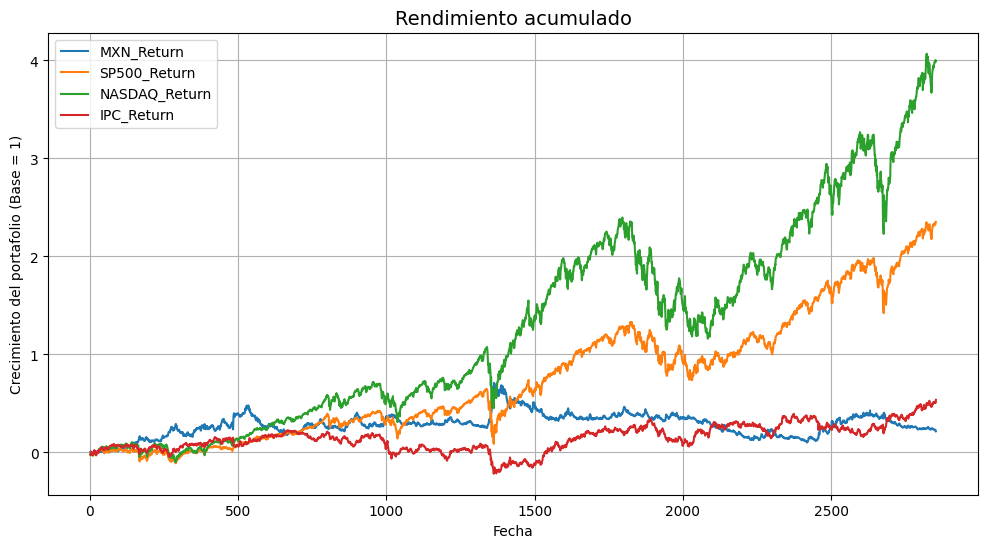

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for col in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[col], label=col)

plt.title("Rendimiento acumulado", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Crecimiento del portafolio (Base = 1)")
plt.legend()
plt.grid(True)
plt.show()

####3.2 Volatilidad anualizada

In [8]:
volatility = df_returns.std() * (252 ** 0.5)
volatility

,0
MXN_Return,0.126285
SP500_Return,0.176214
NASDAQ_Return,0.212695
IPC_Return,0.153530


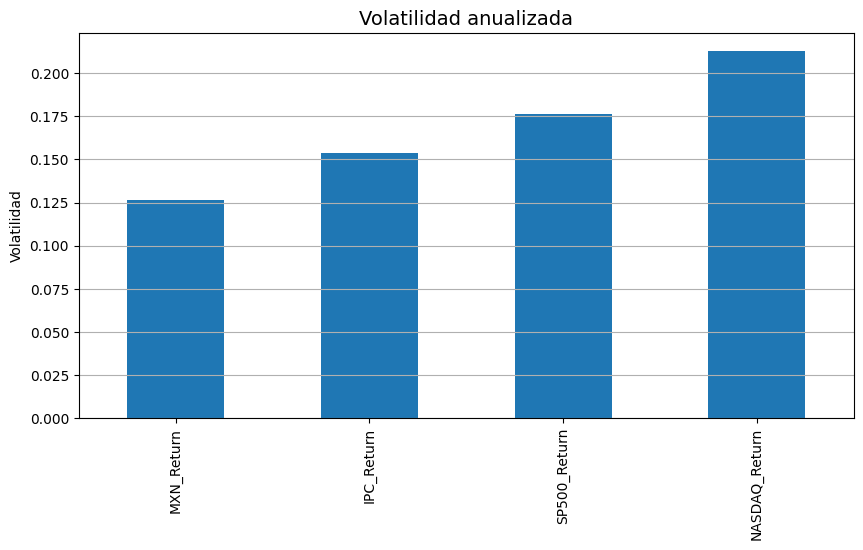

In [16]:
plt.figure(figsize=(10,5))
volatility.sort_values().plot(kind='bar', figsize=(10,5))
plt.title("Volatilidad anualizada", fontsize=14)
plt.ylabel("Volatilidad")
plt.grid(axis='y')
plt.show()

####3.3 Sharpe Ratio
Se asumió una tasa libre de riesgo del 4.13% anual (Bono de Estados Unidos a 10 años).

=== Annual Return ===
MXN_Close     0.025575
GSPC_Close    0.122495
IXIC_Close    0.164765
MXX_Close     0.049765
dtype: float64

=== Volatility ===
MXN_Close     0.126270
GSPC_Close    0.176214
IXIC_Close    0.212695
MXX_Close     0.153530
dtype: float64

=== Sharpe Ratio ===
MXN_Close    -0.124538
GSPC_Close    0.460773
IXIC_Close    0.580480
MXX_Close     0.055137
dtype: float64


/tmp/ipython-input-767810658.py:13: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_returns = df_clean.set_index("Date")[["MXN_Close", "GSPC_Close", "IXIC_Close", "MXX_Close"]].pct_change()


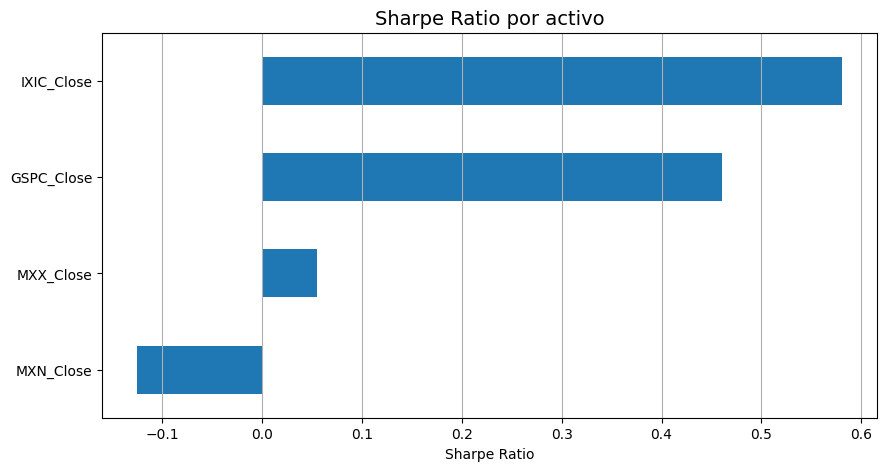

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ============================
# 1. Cargar dataset limpio
# ============================
df_clean = pd.read_csv("market_data_clean.csv")

# ============================
# 2. Calcular retornos diarios
# ============================
df_returns = df_clean.set_index("Date")[["MXN_Close", "GSPC_Close", "IXIC_Close", "MXX_Close"]].pct_change()

# ============================
# 3. KPIs: Retorno anualizado, Volatilidad y Sharpe
# ============================
annual_return = df_returns.mean() * 252
volatility = df_returns.std() * np.sqrt(252)
risk_free_rate = 0.0413

sharpe_ratio = (annual_return - risk_free_rate) / volatility

print("=== Annual Return ===")
print(annual_return)
print("\n=== Volatility ===")
print(volatility)
print("\n=== Sharpe Ratio ===")
print(sharpe_ratio)

# ============================
# 4. Gráfica del Sharpe Ratio
# ============================
plt.figure(figsize=(10,5))
sharpe_ratio.sort_values().plot(kind='barh')
plt.title("Sharpe Ratio por activo", fontsize=14)
plt.xlabel("Sharpe Ratio")
plt.grid(axis='x')
plt.show()


####3.4 Drawdown

In [10]:
rolling_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - rolling_max)
drawdown.tail()

,MXN_Return,SP500_Return,NASDAQ_Return,IPC_Return
2849,-0.480256,-0.009955,-0.080464,-0.022390
2850,-0.483427,-0.021563,-0.087283,-0.018836
2851,-0.477422,-0.024478,-0.080811,-0.014878
2852,-0.482692,-0.002045,-0.064382,-0.021652
2853,-0.493990,0.000000,-0.077138,0.000000


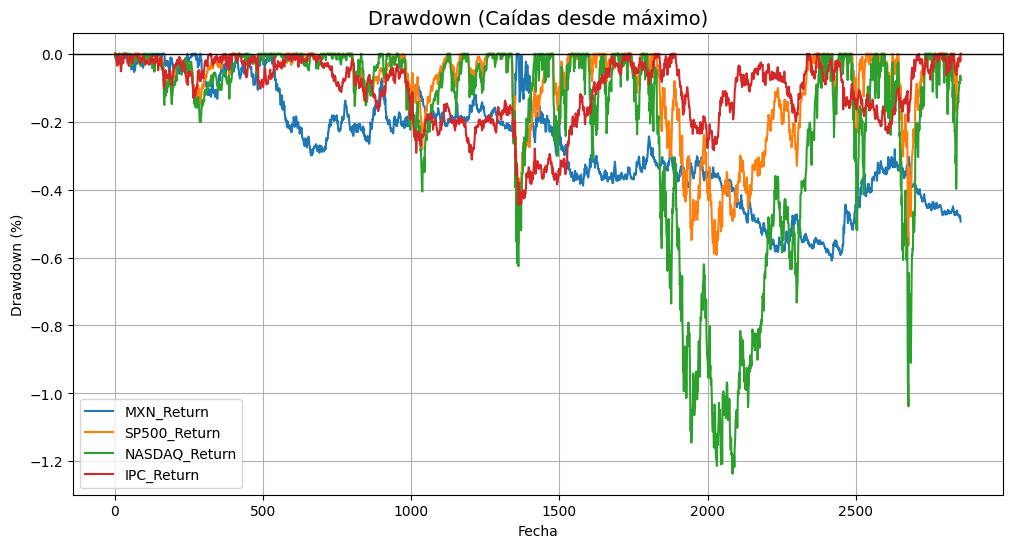

In [14]:
plt.figure(figsize=(12,6))
for col in drawdown.columns:
    plt.plot(drawdown.index, drawdown[col], label=col)

plt.title("Drawdown (Caídas desde máximo)", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Drawdown (%)")
plt.axhline(0, color='black', linewidth=1)
plt.legend()
plt.grid(True)
plt.show()
